# Download KorNLI Dataset

In [1]:
!git clone https://github.com/kakaobrain/KorNLUDatasets

Cloning into 'KorNLUDatasets'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.
Checking out files: 100% (9/9), done.


# Import Packages

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

In [3]:
DATA_PATH = './KorNLUDatasets'

TRAIN_XNLI_DF = os.path.join(DATA_PATH,'KorNLI','multinli.train.ko.tsv')
multinli_data = pd.read_csv(TRAIN_XNLI_DF,sep='\t',error_bad_lines=False)
multinli_data.head(15)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [4]:
print(len(multinli_data))

385494


In [5]:
TRAIN_SNLI_DF = os.path.join(DATA_PATH,'KorNLI','snli_1.0_train.ko.tsv')
snli_data = pd.read_csv(TRAIN_SNLI_DF,sep='\t',error_bad_lines=False)
snli_data.head(15)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [6]:
len(snli_data)

550152

In [7]:
train_data = pd.concat([multinli_data,snli_data],axis=0)
train_data.shape

(935646, 3)

# EDA & Preprocessing

In [8]:
train_set = pd.Series(train_data['sentence1'].tolist()+train_data['sentence2'].tolist()).astype(str)

In [9]:
print(train_set.head())
print(train_set.shape)

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object
(1871292,)


In [10]:
train_set.nunique()

1105355

In [11]:
np.sum(train_set.value_counts() > 1)

308368

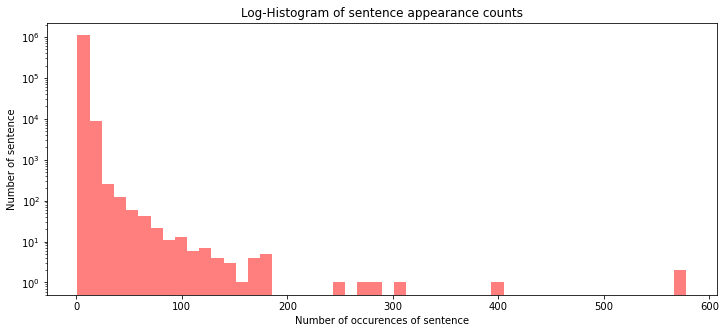

In [12]:
# duplicated sentence visualization

plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(),bins=50,alpha=.5,color='r',label='word')
plt.yscale('log',nonpositive='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurences of sentence')
plt.ylabel('Number of sentence')
plt.show()

In [13]:
print(f'Max Duplicated Counts: {np.max(train_set.value_counts())}')
print(f'Min Duplicated Counts: {np.min(train_set.value_counts())}')
print(f'Mean Duplicated Counts: {np.mean(train_set.value_counts()):.2f}')
print(f'Std Duplicated Counts: {np.std(train_set.value_counts()):.2f}')
print(f'Median Duplicated Counts: {np.median(train_set.value_counts())}')
print(f'1th percentile Duplicated Counts: {np.percentile(train_set.value_counts(),25)}')
print(f'3th percentile Duplicated Counts: {np.percentile(train_set.value_counts(),75)}')


Max Duplicated Counts: 578
Min Duplicated Counts: 1
Mean Duplicated Counts: 1.69
Std Duplicated Counts: 2.23
Median Duplicated Counts: 1.0
1th percentile Duplicated Counts: 1.0
3th percentile Duplicated Counts: 3.0


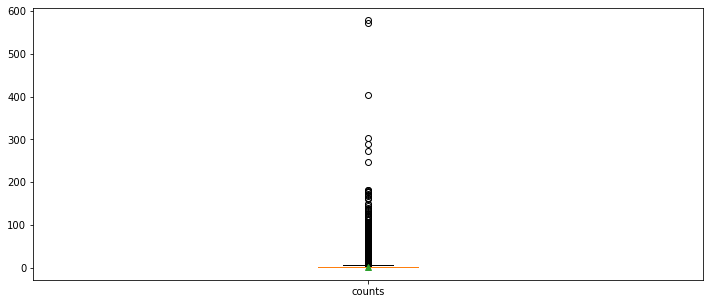

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],labels=['counts'],showmeans=True)
plt.show()

In [15]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased",cache_dir='berk_ckpt',do_lower_case=False)
def get_token_len(x):
    return len(tokenizer.tokenize(x))
    
train_bert_token_counts = train_set.apply(get_token_len)

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

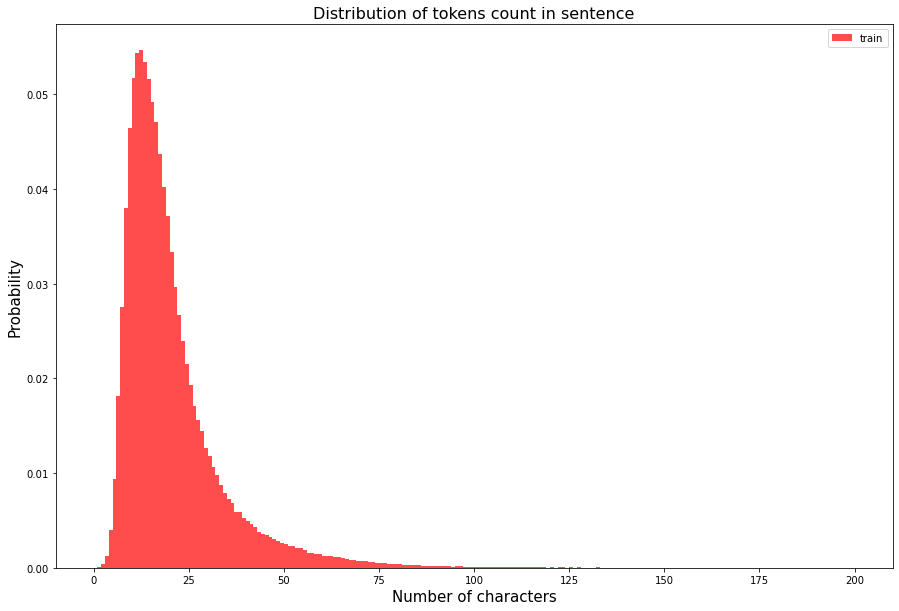

In [16]:
plt.figure(figsize=(15,10))
plt.hist(train_bert_token_counts,bins=200,range=[0,200],facecolor='r',density=True,label='train',alpha=.7)
plt.title('Distribution of tokens count in sentence',fontsize=16)
plt.legend()
plt.xlabel('Number of characters',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

In [17]:
print(f'Max Token Counts: {np.max(train_bert_token_counts)}')
print(f'Min Token Counts: {np.min(train_bert_token_counts)}')
print(f'Mean Token Counts: {np.mean(train_bert_token_counts):.2f}')
print(f'Std Token Counts: {np.std(train_bert_token_counts):.2f}')
print(f'Median Token Counts: {np.median(train_bert_token_counts)}')
print(f'1th percentile Token Counts: {np.percentile(train_bert_token_counts,25)}')
print(f'3th percentile Token Counts: {np.percentile(train_bert_token_counts,75)}')
print(f'99% Token Counts: {np.percentile(train_bert_token_counts,99)}')

Max Token Counts: 9006
Min Token Counts: 1
Mean Token Counts: 20.24
Std Token Counts: 26.77
Median Token Counts: 16.0
1th percentile Token Counts: 11.0
3th percentile Token Counts: 24.0
99% Token Counts: 72.0


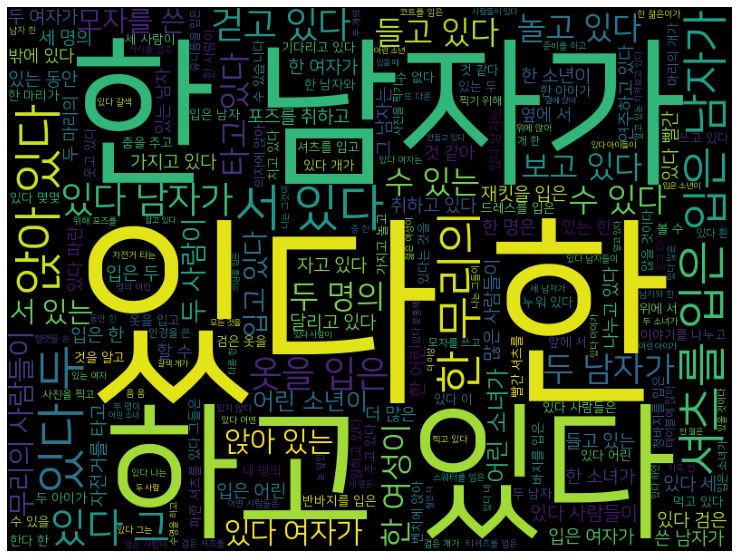

In [18]:
from wordcloud import WordCloud
font_dir = '../input/nanum34'
wc = WordCloud(font_path = os.path.join(font_dir,'NanumSquareR.ttf'), width=800, height=600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()


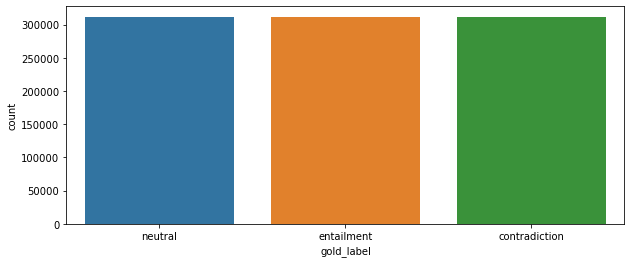

In [19]:
# gold_label distribution
fig,ax = plt.subplots(1)
fig.set_size_inches(10,4)
sns.countplot(data=train_data, x='gold_label')
plt.show()

In [20]:
import tensorflow as tf
# text preprocessing

# set seedte
tf.random.set_seed(1111)
np.random.seed(1111)

# config
BATCH_SIZE = 128
MAX_LEN = 48
BATCH_SIZE = 128


TRAIN_SNLI_DF = './KorNLUDatasets/KorNLI/snli_1.0_train.ko.tsv'
TRAIN_XNLI_DF = './KorNLUDatasets/KorNLI/multinli.train.ko.tsv'
DEV_XNLI_DF = './KorNLUDatasets/KorNLI/xnli.dev.ko.tsv'

train_data_snli = pd.read_csv(TRAIN_SNLI_DF,header=0,delimiter='\t',quoting=3)
train_data_xnli = pd.read_csv(TRAIN_XNLI_DF,header=0,delimiter='\t',quoting=3)
dev_data_xnli = pd.read_csv(DEV_XNLI_DF,header=0,delimiter='\t',quoting=3)

train_data_snli_xnli = train_data_snli.append(train_data_xnli)
train_data_snli_xnli.dropna(inplace=True)
train_data_snli_xnli.reset_index(inplace=True)

dev_data_xnli = dev_data_xnli.dropna()
print(f"# Dataset: train - {len(train_data_snli_xnli)}, dev - {len(dev_data_xnli)}")

# Dataset: train - 942808, dev - 2490


In [21]:
# Tokenizer

def bert_tokenizer_v2(sent1, sent2, MAX_LEN):
    encoded_dict = tokenizer.encode_plus(
        text=sent1,
        text_pair=sent2,
        add_special_tokens=True,
        max_length = MAX_LEN, # PAD TRUNCATE ALL
        pad_to_max_length=True,
        return_attention_mask=True,
        )
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # PADDED OR NOT
    token_type_id = encoded_dict['token_type_ids']
    return input_id, attention_mask, token_type_id

input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(train_data_xnli['sentence1'],train_data_xnli['sentence2']):
    try:
        input_id,attention_mask,token_type_id = bert_tokenizer_v2(sent1,sent2,MAX_LEN)
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
    

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
원주민 '내가 이기고, 나는 큰 법을 어기고... nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
생제르맹 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
날씨에 따라서든 그렇지 않든 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
AICPA 미국 공인 회계사 APB 회계 원칙 이사회 ARB 회계 연구 게시판 COSO 트레드 웨이위원회 조직위원회 FAS 재무 회계 기준 FASB 재무 회계 기준위원회 FASAB 연방 회계 기준 자문위원회 FIN FASB Interpertation Form &amp; Content OMB Bulletin 97-01 , 1996 년 10 월 16 일 발행 GAO 일반 회계 사무소 NAA 전국 회계사 협회 OMB 관리 및 예산 사무국 SEC 증권 거래위원회 SFFAC 연방 재무 회계 개념 명세서 SFFAS 연방 재무 회계 표준 명세서 SOP 포지션 명세서 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
토니 슈즈(그래서 클린턴은 슈즈와 양말을 갖게 될 것이다). nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
불륜

In [22]:
train_xnli_input_ids = np.array(input_ids, dtype=int)
train_xnli_attention_masks = np.array(attention_masks,dtype=int)
train_xnli_type_ids = np.array(token_type_ids, dtype=int)
train_xnli_inputs = (train_xnli_input_ids, train_xnli_attention_masks, train_xnli_type_ids)

In [23]:
# check inputs
print(train_data_xnli['sentence1'][3],'\n',train_data_xnli['sentence2'][3])
print(train_xnli_input_ids[3])

어떻게 아세요? 이 모든 것이 다시 그들의 정보다. 
 이 정보는 그들의 것이다.
[   101   9546 118837  14153   9519  24982  48549    136   9638  25701
  27487  25805  96045   9670  80001    119    102   9638   9670  30005
  11018  96045  24190    119    102      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0]


In [24]:
print(train_xnli_attention_masks[3])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
print(token_type_ids[3])
print(tokenizer.decode(train_xnli_input_ids[3]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[CLS] 어떻게 아세요? 이 모든 것이 다시 그들의 정보다. [SEP] 이 정보는 그들의 것이다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [26]:
# token type indicates first and second sentences
print(token_type_ids[1])
print(tokenizer.decode(train_xnli_input_ids[1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[CLS] 시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스가 모 [SEP] 사람들이 기억하면 다음 수준으로 물건을 잃는다. [SEP]


In [27]:
label_dict = {'entailment':0,'contradiction':1,'neutral':2}
def convert_to_int(label):
    num_label = label_dict[label]
    return num_label

train_data_xnli['gold_label_int']=train_data_xnli['gold_label'].apply(convert_to_int)
train_xnli_labels = np.array(train_data_xnli.dropna()['gold_label_int'],dtype=int)

print("# sents: {}, # labels: {}".format(len(train_xnli_input_ids),len(train_xnli_labels)))

# sents: 392662, # labels: 392662


# Modeling, Training

In [28]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, )

SyntaxError: invalid syntax (<ipython-input-28-adbb10d53a5f>, line 2)